https://datascience.stackexchange.com/questions/81404/binary-classification-of-2d-vectors-with-neural-networks

In [16]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
import matplotlib.pyplot as plt
import numpy as np

num_data = 5000
noise = init.normal_(torch.FloatTensor(num_data, 1), std=30)

#x = init.uniform_(torch.Tensor(num_data, 1), -10, 10)
x = init.uniform_(torch.Tensor(num_data, 2), -10, 10)

#def func(x): 
#    return 0.5*(x**3) - 0.5*(x**2) - torch.sin(2*x)*90 + 1

w = torch.Tensor([2, 3])

def func(x): 
    #print('func' , x)
    return torch.matmul(x, w) 

'''
def func(x): 
    if x[0] > 0:
        if x[1] > 0:
            return 1
        else:
            return 4
    else:
        if x[1] > 0:
            return 2
        else:
            return 3
'''

train = func(x)
#print(x.shape, train.shape)

x= x.reshape(-1,1)
print(x, train)

tensor([[ 2.2067],
        [-5.0812],
        [-2.9121],
        ...,
        [-5.7717],
        [ 4.6783],
        [-7.4748]]) tensor([-10.8304, -22.1953,   4.2367,  ..., -38.0267, -33.9419, -13.0678])


In [2]:
model = nn.Sequential(    
    nn.Linear(1, 5),
    nn.LeakyReLU(0.2),
    nn.Linear(5, 10),
    nn.LeakyReLU(0.2),
    nn.Linear(10, 10),
    nn.LeakyReLU(0.2),
    nn.Linear(10, 10),
    nn.LeakyReLU(0.2),
    nn.Linear(10, 5),
    nn.LeakyReLU(0.2),
    nn.Linear(5, 1),
)


In [3]:

device = "cuda" if torch.cuda.is_available() else "cpu"

loss_func = nn.L1Loss().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.002)
model = model.to(device)
x = x.to(device)

train = train.to(device)
#num_epoch = 20000
num_epoch = 1000
loss_array = []

model.train()
for epoch in range(num_epoch):
    optimizer.zero_grad()
    output = model(x)    
    loss = loss_func(output, train)
    loss.backward()
    optimizer.step()
    
    loss_array.append(loss)
    if epoch % 100 == 0:
        print('epoch:', epoch, ' loss:', loss.item())

c:\Python310\lib\site-packages\torch\nn\modules\loss.py:101: UserWarning: Using a target size (torch.Size([5000])) that is different to the input size (torch.Size([10000, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


epoch: 0  loss: 17.199724197387695
epoch: 100  loss: 17.199716567993164
epoch: 200  loss: 17.199716567993164
epoch: 300  loss: 17.199716567993164
epoch: 400  loss: 17.199716567993164
epoch: 500  loss: 17.199716567993164
epoch: 600  loss: 17.199716567993164
epoch: 700  loss: 17.199716567993164
epoch: 800  loss: 17.199716567993164
epoch: 900  loss: 17.199716567993164
epoch: 1000  loss: 17.199716567993164
epoch: 1100  loss: 17.199716567993164
epoch: 1200  loss: 17.199716567993164
epoch: 1300  loss: 17.199716567993164
epoch: 1400  loss: 17.199716567993164
epoch: 1500  loss: 17.199716567993164
epoch: 1600  loss: 17.199716567993164
epoch: 1700  loss: 17.199716567993164
epoch: 1800  loss: 17.199716567993164
epoch: 1900  loss: 17.199716567993164
epoch: 2000  loss: 17.199716567993164
epoch: 2100  loss: 17.199716567993164
epoch: 2200  loss: 17.199716567993164
epoch: 2300  loss: 17.199716567993164
epoch: 2400  loss: 17.199716567993164
epoch: 2500  loss: 17.199716567993164
epoch: 2600  loss: 17.19

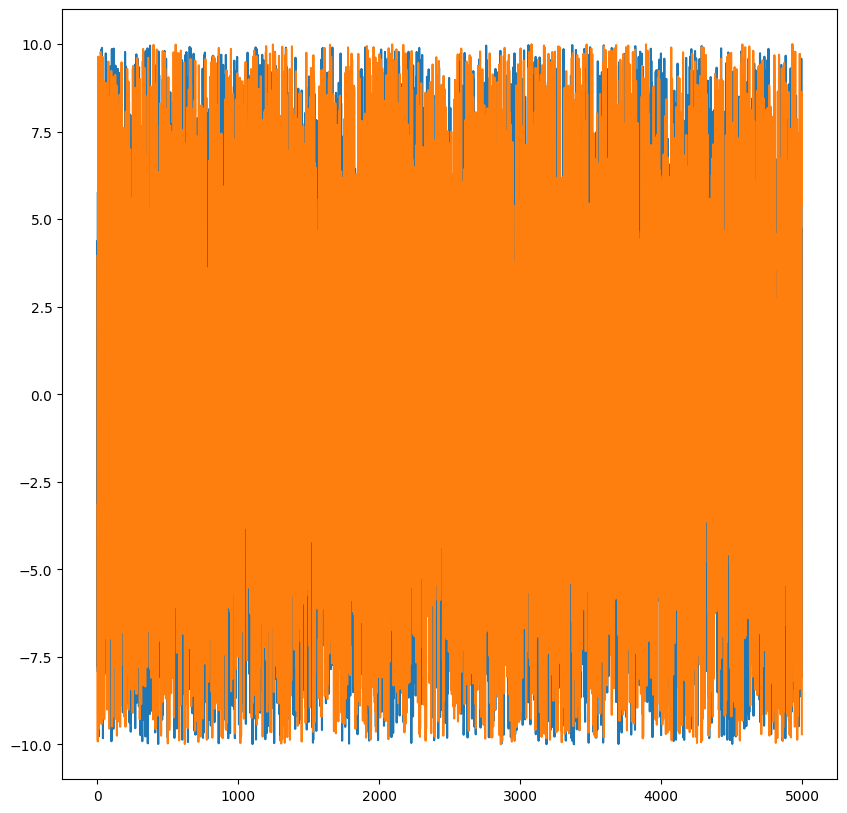

In [12]:
# print(loss_array)
#loss_array = loss_array.cpu().detach().numpy()
# plt.plot(loss_array)
# plt.show()

plt.figure(figsize=(10,10))
p_x = x.cpu().detach().numpy()
p_y_noise = train.cpu().detach().numpy()
p_output = output.cpu().detach().numpy()

#p_x = p_x.reshape(-1,2)
#plt.scatter(p_x, p_y_noise, s=1, c="gray")
#plt.scatter(p_x, p_output, s=1, c="red")
#plt.show()

In [28]:
model.eval()

#tx = torch.Tensor([[2,3]])
#p = model(tx)
#print(p)

SCALE = 40

def get_coordinate_map(width, height):
    ones = np.ones((height, width))
    offset = np.array([(width / 2) * ones, (height / 2) * ones])
    coordinates = np.indices((height, width)) - offset
    return coordinates.reshape(2, width * height).T

def get_rectangle(width, height, rectangle_width, rectangle_height):
    ones = np.ones((height, width))
    offset = np.array([(width / 2) * ones, (height / 2) * ones])
    coordinates = np.indices((height, width)) - offset
    flat_coordinates = coordinates.reshape(2, width * height)
    rectangle = []
    x1, x2 = -rectangle_width / 2, rectangle_width / 2
    y1, y2 = -rectangle_height / 2, rectangle_height / 2
    for x, y in flat_coordinates.T:
        if x1 < x < x2 and y1 < y < y2:
            rectangle.append(1)
        else:
            rectangle.append(0)
    return np.array(rectangle).T    

training_points = get_coordinate_map(SCALE, SCALE)
training_labels = get_rectangle(SCALE, SCALE, 10, 10)
#print(len(training_points[::3]))
print(training_points[::3])


[[-20. -20.]
 [-20. -17.]
 [-20. -14.]
 ...
 [ 19.  13.]
 [ 19.  16.]
 [ 19.  19.]]


In [32]:
import keras
import tensorflow as tf
from tensorflow.keras.layers import Flatten, Dense

model = keras.Sequential(
            [
                Dense(20, activation="relu"),
                Dense(2, activation="softmax")
            ]
        )
model.compile(
    optimizer="adam",
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=["accuracy"]
)

model.build((None, 2))
model.fit(training_points[::3], 
        np.array([training_labels[::3], 1-training_labels[::3]]).T, 
        epochs=10, batch_size=20)

loss, accuracy = model.evaluate(training_points, 
            np.array([training_labels, 1-training_labels]).T, verbose=2)
print(loss, accuracy)        

NameError: name 'tf' is not defined